### Problem Statement

Many of your friends are worried about their chances of getting admission in their dream university for pursuing MS. So, you decided to help them by building a model which is capable of predicting their chance of getting admission in their dream masters program. This model will also help in understanding which factors are important in MS admissions and what are the scores required for different tests to have better admission chances.

Build a prediction model using multiple linear regression to predict the likelihood of getting admission and evaluate the accuracy of the model.






---

### List of Activities

**Activity 1:** Analysing the Dataset

**Activity 2:** Finding Correlation
  
**Activity 3:** Train-Test Split

**Activity 4:**  Model Training

**Activity 5:** Model Prediction 

**Activity 6:** Model Evaluation







---


#### Activity 1:  Analysing the Dataset

- Create a Pandas DataFrame for **Admission_Predict** dataset using the below link. This dataset consists of several parameters which are considered important during the application for Masters program:


|Field|Description|
|---:|:---|
|Serial No.|Serial No.|
|GRE Score|GRE Scores ( out of 340 )|
|TOEFL Score|TOEFL Scores ( out of 120 )|
|University Rating|University Rating ( out of 5 )|
|SOP|Statement of Purpose Strength ( out of 5 )|
|LOR|Letter of Recommendation Strength ( out of 5 )|
|CGPA|Undergraduate GPA ( out of 10 )|
|Research|Research Experience ( either 0 or 1 )|
|Chance of Admit|Chance of Admit ( ranging from 0 to 1 )|



  **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/Admission_Predict.csv

- Print the first five rows of the dataset. Check for null values and treat them accordingly.

- Also drop the column `Serial No.` from the dataset as it is of no use for analysis. Check whether the column names contain any trailing and leading spaces. If yes, remove the whitespaces from the column names.

**Hint:** You can use `strip()` and `rename()` functions to remove unwanted whitespaces from the column name and to rename them.






In [ ]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset.

df = pd.read_csv( 'https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/Admission_Predict.csv')

# Load the dataset

# Print first five rows using head() function
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Get the list of columns of the dataset.
df.columns


Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# Drop 'Serial No.' column from the DataFrame
df=df.drop('Serial No.',axis=1)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Remove whitespaces from both ends in the column name if there are any
for i in df.columns:
  df.rename(columns={i:i.strip()},inplace=True)
  #df.columns


# Get list of all the columns after renaming.
df.columns


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

---

#### Activity 2: Finding Correlation

We need to predict the value of `Chance of Admit` variable, given other variables. Thus, `Chance of Admit` is the target variable and other columns except `Chance of Admit` are the feature variables.

Find the columns that are highly correlated with the `Chance of Admit` column. For this, calculate the correlation coefficient values between all the columns and then use a heatmap to visualize these correlations.

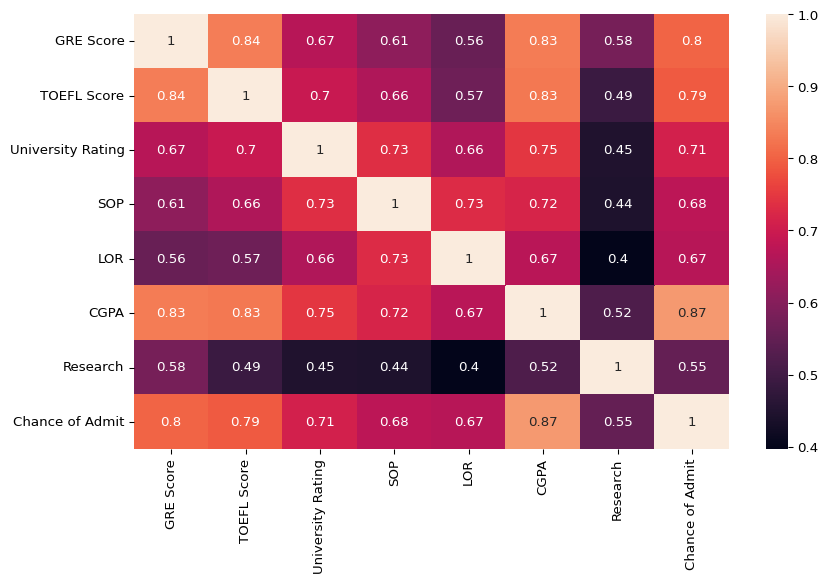

In [ ]:
# Calculate correlation coefficient for all columns of the DataFrame

corr_df = df.corr()
plt.figure(figsize = (10, 6), dpi = 96)
sns.heatmap(data = corr_df, annot = True) # 'annot=True' fills the R values in the heatmap cells.
plt.show()


**Q:** On observing the heatmap, which three scores seems most important for getting admission in an MS program?

**A:** GRE SCORE, TOFEL SCORE, CGPA

---

#### Activity 3: Train-Test Split


Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

In [ ]:
# Split the DataFrame into the training and test sets.

from sklearn.model_selection import train_test_split

X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

# Splitting the DataFrame into the train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42) # Test set will have 33% of the values.


---

#### Activity 4: Model Training

Implement multiple linear regression using `sklearn` module by creating an object of the `LinearRegression` class and calling the `fit()` function.

**Note:** Reshaping the target variable array into a 2D array is not mandatory in multiple linear regression. You can skip that.

In [ ]:
# Build linear regression model

from sklearn.linear_model import LinearRegression

sklearn_lin_reg = LinearRegression()
sklearn_lin_reg.fit(X_train, y_train)

# Print the value of the intercept i.e. beta-sub-0.
print("\nConstant".ljust(15, " "), f"{sklearn_lin_reg.intercept_:.6f}") # Soon you will get to know why rounding-off to 6 decimal places.

# Print the names of the of the features along with the values of their correspding coefficients.
for item in list(zip(X.columns.values, sklearn_lin_reg.coef_)):
  print(f"{item[0]}".ljust(15, " "), f"{item[1]:.6f}") 
 


Constant       -1.284178
GRE Score       0.001840
TOEFL Score     0.003171
University Rating 0.004866
SOP             0.000995
LOR             0.013695
CGPA            0.117818
Research        0.018439


---

#### Activity 5: Model Prediction using Test Set

Predict the values for the test set by calling the `predict()` function on the LinearRegression object. 

Also, predict your friend's chances of getting admission into his dream university with a GRE score of 350, TOEFL score of 115, University Rating of 3, SOP of score 3, 3 LORs, CGPA of 9.8 and having research papers.

**Note:** Pass the values of all feature variables to the `predict()` function in the form of a 2D array as follows:

`predict([[350, 115, 3, 3, 3, 9.8, 1]])`

In [ ]:
# Predict the target variable values for test set
y_test_pred = sklearn_lin_reg.predict(X_test)
print(y_test_pred)


[0.64734197 0.72165881 0.93540267 0.82079041 0.57781233 0.9282453
 0.52898217 0.54049852 0.6642913  0.84453894 0.72491972 0.91192259
 0.55014279 0.88795065 0.70151728 0.69045265 0.66999264 0.48163309
 0.69099994 0.97632508 0.59207825 0.65665649 0.71377809 0.53497985
 0.95093543 0.810305   0.69409622 0.56684368 0.67946535 0.81457938
 0.81022743 0.94667098 0.64560622 0.51450621 0.66361741 0.67144094
 0.7235074  0.6480692  0.61989951 0.88414197 0.74108467 0.59701292
 0.77704183 0.96177165 0.84899462 0.83589569 0.95175439 0.65471687
 0.92257385 0.85934346 0.89351388 0.72601699 0.78377786 0.95276909
 0.57555615 0.59192473 0.69115154 0.84305695 0.60189253 0.84517226
 0.66665763 0.65574046 0.7006315  0.50851903 0.63275593 0.71371096
 0.61905871 0.84500458 0.85769092 0.79819613 0.72154137 0.82117028
 0.87634528 0.83168876 0.52556205 0.7241952  0.69790972 0.59279484
 0.88165673 0.76416428 0.74926046 0.74612311 0.9982953  0.71427734
 0.59018175 0.70931891 0.79704563 0.73055045 0.9139551  0.65702

In [ ]:
# Make new prediction for your friend

new_test_pred = sklearn_lin_reg.predict([[350, 115, 3, 3, 3, 9.8, 1]])
print(new_test_pred)



[0.95611334]


**Q:** How much is your friend's chance of getting admission for MS?

**A:** 95%

---

#### Activity 6: Model Evaluation

Calculate the $R^2$, MSE, RMSE and MAE values for the test set to evaluate the accuracy of your model.

In [ ]:
# Evaluate the model using the 'r2_score', 'mean_squared_error' & 'mean_absolute_error' functions of the 'sklearn' module for the test set.

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

      
print(f"\n\nTest Set\n{'-' * 50}")
print(f"R-squared: {r2_score(y_test, y_test_pred):.3f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_test_pred)):.3f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_test_pred):.3f}")




Test Set
--------------------------------------------------
R-squared: 0.796
Mean Squared Error: 0.005
Root Mean Squared Error: 0.068
Mean Absolute Error: 0.049
